In [1]:
import pandas as pd
import re
import nltk
import gensim

train_df = pd.read_csv("../../kaggle_data/train_data.txt",
                       engine="python",
                       sep=" ::: ",
                       names=['id', "movie", "genre", "summary"])

test_df = pd.read_csv("../../kaggle_data/test_data_solution.txt",
                      engine="python",
                      sep=" ::: ",
                      names=['id', "movie", "genre", "summary"])


In [2]:
# Save the DataFrame to a CSV file
train_df.to_csv('train_data_output.csv', index=False)
test_df.to_csv('test_data_output.csv', index=False)

# Load the two DataFrames from CSV files
df1 = pd.read_csv('test_data_output.csv')
df2 = pd.read_csv('train_data_output.csv')

# Concatenate the two DataFrames along the rows
merged_data = pd.concat([df1, df2], axis=0, ignore_index=True)

# Save the concatenated DataFrame to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

In [3]:
df_merged = pd.read_csv('merged_data.csv')

In [4]:
df_merged

,id,movie,genre,summary
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apart..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty chi..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family o...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with his..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a marti...
...,...,...,...,...
108409,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
108410,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
108411,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
108412,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [5]:
# final data for processing Remove the columns
df = df_merged.drop(columns=['id'], axis=1)
df = df.sample(frac=1)
df

,movie,genre,summary
92251,Broken Land (2014),documentary,"Out in desert-like nature, living in the shado..."
48920,Oculto (2005),drama,"In Madrid, the editor of the magazine Ziber-Ar..."
43880,Return of the Frontiersman (1950),western,Sheriff Sam Barrett ('Jack Holt (I)' (qv)) has...
41140,Guca's Tigers (2010),documentary,"Since 1961, in the small town of Guca, the Tru..."
59695,Hikikomori: Tokyo Plastic (2004),thriller,"In ""Hikikomori: Tokyo Plastic,"" Naomi, a young..."
...,...,...,...
74286,Ya dumal: ya - Adam... ili Dolgaya doroga v Go...,biography,"This is a story about an actor, Alik Votintsev..."
623,Showbobo (2006),documentary,DJBobo is a unique musical phenomenon. Million...
95698,The Juilliard String Quartet: Keeping Beethove...,documentary,An encounter with the members of the famous st...
81261,Taking the Long Way Home (????),drama,Loss & betrayal invoke Alex to take control of...


In [6]:
df

,movie,genre,summary
92251,Broken Land (2014),documentary,"Out in desert-like nature, living in the shado..."
48920,Oculto (2005),drama,"In Madrid, the editor of the magazine Ziber-Ar..."
43880,Return of the Frontiersman (1950),western,Sheriff Sam Barrett ('Jack Holt (I)' (qv)) has...
41140,Guca's Tigers (2010),documentary,"Since 1961, in the small town of Guca, the Tru..."
59695,Hikikomori: Tokyo Plastic (2004),thriller,"In ""Hikikomori: Tokyo Plastic,"" Naomi, a young..."
...,...,...,...
74286,Ya dumal: ya - Adam... ili Dolgaya doroga v Go...,biography,"This is a story about an actor, Alik Votintsev..."
623,Showbobo (2006),documentary,DJBobo is a unique musical phenomenon. Million...
95698,The Juilliard String Quartet: Keeping Beethove...,documentary,An encounter with the members of the famous st...
81261,Taking the Long Way Home (????),drama,Loss & betrayal invoke Alex to take control of...


In [7]:
# Data Engineering
# Case conversion, Removing special characters, 
# Removing accents, Normalize spaces

from nltk.stem import WordNetLemmatizer

# lemmatizer
lemmatizer = WordNetLemmatizer()

# Remove punctuation
df['summary'] = df['summary'].map(lambda x: re.sub('[:,\.!?-]', '', x))

# Convert the titles to lowercase
df['summary'] = df['summary'].map(lambda x: x.lower())

# # Perform lemmatization
df['summary'] = df['summary'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

 # remove accents
def remove_accents():
    df.summary = [unidecode.unidecode(text) for text in df.summary.values]
    
# #normalized space  
def normalize_spaces():
    df.summary = [re.sub(r"\s+"," ",text) for text in df.summary.values]



In [8]:
df

,movie,genre,summary
92251,Broken Land (2014),documentary,out in desertlike nature living in the shadow ...
48920,Oculto (2005),drama,in madrid the editor of the magazine ziberarte...
43880,Return of the Frontiersman (1950),western,sheriff sam barrett ('jack holt (i)' (qv)) ha ...
41140,Guca's Tigers (2010),documentary,since 1961 in the small town of guca the trump...
59695,Hikikomori: Tokyo Plastic (2004),thriller,"in ""hikikomori tokyo plastic"" naomi a young ja..."
...,...,...,...
74286,Ya dumal: ya - Adam... ili Dolgaya doroga v Go...,biography,this is a story about an actor alik votintsev ...
623,Showbobo (2006),documentary,djbobo is a unique musical phenomenon million ...
95698,The Juilliard String Quartet: Keeping Beethove...,documentary,an encounter with the member of the famous str...
81261,Taking the Long Way Home (????),drama,loss & betrayal invoke alex to take control of...


In [9]:
# remove stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu'])

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = df.summary.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
df['summary'] = remove_stopwords(data_words)

<AxesSubplot:ylabel='genre'>

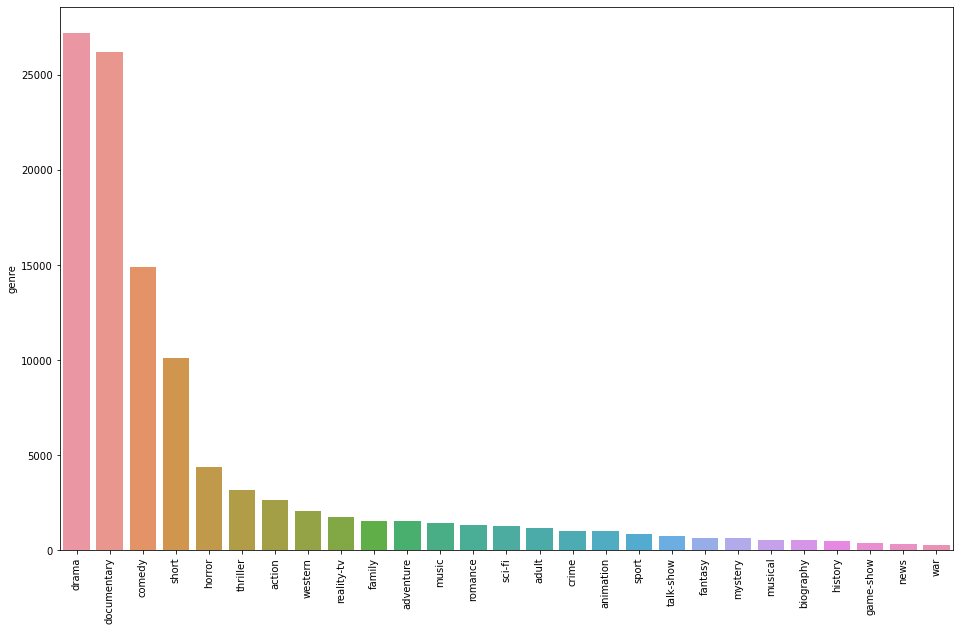

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
counts = df['genre'].value_counts()
plt.xticks(rotation=90);
sns.barplot(x=counts.index, y=counts)
# plt.barh(counts.index, counts.values)
# plt.xlabel('Count')
# plt.ylabel('Genre')
# plt.title('Genre Counts')
# plt.show()

In [40]:
df_test=df

In [41]:
df_test

,movie,genre,summary
92251,Broken Land (2014),documentary,"[desertlike, nature, living, shadow, immense, ..."
48920,Oculto (2005),drama,"[madrid, editor, magazine, ziberarte, alex, cu..."
43880,Return of the Frontiersman (1950),action,"[sheriff, sam, barrett, jack, holt, qv, ha, ja..."
41140,Guca's Tigers (2010),documentary,"[since, small, town, guca, trumpet, festival, ..."
59695,Hikikomori: Tokyo Plastic (2004),action,"[hikikomori, tokyo, plastic, naomi, young, jap..."
...,...,...,...
74286,Ya dumal: ya - Adam... ili Dolgaya doroga v Go...,documentary,"[story, actor, alik, votintsev, rumor, ha, cou..."
623,Showbobo (2006),documentary,"[djbobo, unique, musical, phenomenon, million,..."
95698,The Juilliard String Quartet: Keeping Beethove...,documentary,"[encounter, member, famous, string, quartet, f..."
81261,Taking the Long Way Home (????),drama,"[loss, betrayal, invoke, alex, take, control, ..."


In [42]:
#df_test.replace(to_replace={"gene": {"horror": "adventure"}}, inplace=True)
#df_test.replace(to_replace={"gene": {"thriller": "adventure"}}, inplace=True)
name_map = {"family":"drama",
            "fantasy":"drama",
            "romance":"drama",
            "biography":"documentary",
            "history":"documentary",
            "news":"documentary",
            "reality-tv":"documentary",
            "talk-show":"comedy",
            "music":"short",
            "musical":"short",
            "animation":"short",
            "thriller": "action",
            "horror":"action",
            "adult": "action",
            "adventure":"action",
            "crime": "action",
            "game-show":"action",
            "mystery": "action",
            "sci-fi":"action",
            "sport": "action",
            "war": "action",
            "western":"action"
            }
df_test["genre"] = df_test["genre"].replace(name_map)

In [43]:
df_test

,movie,genre,summary
92251,Broken Land (2014),documentary,"[desertlike, nature, living, shadow, immense, ..."
48920,Oculto (2005),drama,"[madrid, editor, magazine, ziberarte, alex, cu..."
43880,Return of the Frontiersman (1950),action,"[sheriff, sam, barrett, jack, holt, qv, ha, ja..."
41140,Guca's Tigers (2010),documentary,"[since, small, town, guca, trumpet, festival, ..."
59695,Hikikomori: Tokyo Plastic (2004),action,"[hikikomori, tokyo, plastic, naomi, young, jap..."
...,...,...,...
74286,Ya dumal: ya - Adam... ili Dolgaya doroga v Go...,documentary,"[story, actor, alik, votintsev, rumor, ha, cou..."
623,Showbobo (2006),documentary,"[djbobo, unique, musical, phenomenon, million,..."
95698,The Juilliard String Quartet: Keeping Beethove...,documentary,"[encounter, member, famous, string, quartet, f..."
81261,Taking the Long Way Home (????),drama,"[loss, betrayal, invoke, alex, take, control, ..."


<AxesSubplot:ylabel='genre'>

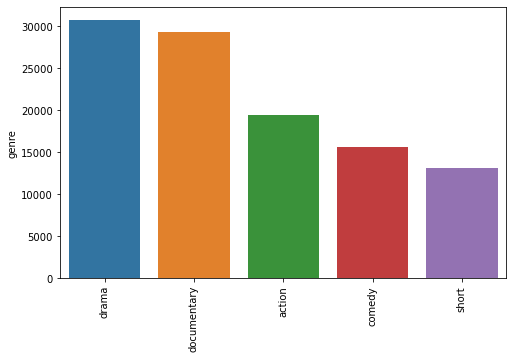

In [48]:
plt.figure(figsize=(8,5))
counts = df_test['genre'].value_counts()
plt.xticks(rotation=90);
sns.barplot(x=counts.index, y=counts)

In [49]:
print(counts.index, counts)

Index(['drama', 'documentary', 'action', 'comedy', 'short'], dtype='object') drama          30781
documentary    29336
action         19466
comedy         15675
short          13156
Name: genre, dtype: int64
